In [59]:
# Capstone Project - Credit Card Fraud Detection
# Importing Libraries
import numpy as np
import pandas as pd

In [60]:
# Loading the dataset 
data_train = pd.read_csv('fraudTrain.csv')
data_test = pd.read_csv('fraudTest.csv')

In [61]:
# Viewing the train dataset
data_train.head(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0.0,1/1/2019 0:00,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",3/9/1988,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1.0,1/1/2019 0:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,6/21/1978,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2.0,1/1/2019 0:00,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1/19/1962,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3.0,1/1/2019 0:01,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1/12/1967,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4.0,1/1/2019 0:03,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,3/28/1986,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0
5,5.0,1/1/2019 0:04,4.767270e+15,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,...,40.3750,-75.2045,2158.0,Transport planner,6/19/1961,189a841a0a8ba03058526bcfe566aab5,1.325376e+09,40.653382,-76.152667,0.0
6,6.0,1/1/2019 0:04,3.007470e+13,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,...,37.9931,-100.9893,2691.0,Arboriculturist,8/16/1993,83ec1cc84142af6e2acf10c44949e720,1.325376e+09,37.162705,-100.153370,0.0
7,7.0,1/1/2019 0:05,6.011360e+15,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,...,38.8432,-78.6003,6018.0,"Designer, multimedia",8/21/1947,6d294ed2cc447d2c71c7171a3d54967c,1.325376e+09,38.948089,-78.540296,0.0
8,8.0,1/1/2019 0:05,4.922710e+15,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,...,40.3359,-79.6607,1472.0,Public affairs consultant,3/7/1941,fc28024ce480f8ef21a32d64c93a29f5,1.325376e+09,40.351813,-79.958146,0.0
9,9.0,1/1/2019 0:06,2.720830e+15,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,...,36.5220,-87.3490,151785.0,Pathologist,3/28/1974,3b9014ea8fb80bd65de0b1463b00b00e,1.325376e+09,37.179198,-87.485381,0.0


In [62]:
# Viewing the test dataset
data_test.head(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
5,5,2020-06-21 12:15:37,30407675418785,fraud_Daugherty LLC,kids_pets,19.55,Danielle,Evans,F,76752 David Lodge Apt. 064,...,42.1939,-76.7361,520,Psychotherapist,1991-10-13,798db04aaceb4febd084f1a7c404da93,1371816937,41.747157,-77.584197,0
6,6,2020-06-21 12:15:44,213180742685905,fraud_Romaguera Ltd,health_fitness,133.93,Kayla,Sutton,F,010 Weaver Land,...,40.5070,-123.9743,1139,"Therapist, occupational",1951-01-15,17003d7ce534440eadb10c4750e020e5,1371816944,41.499458,-124.888729,0
7,7,2020-06-21 12:15:50,3589289942931264,fraud_Reichel LLC,personal_care,10.37,Paula,Estrada,F,350 Stacy Glens,...,43.7557,-97.5936,343,"Development worker, international aid",1972-03-05,8be473af4f05fc6146ea55ace73e7ca2,1371816950,44.495498,-97.728453,0
8,8,2020-06-21 12:16:10,3596357274378601,"fraud_Goyette, Howell and Collier",shopping_pos,4.37,David,Everett,M,4138 David Fall,...,41.0001,-78.2357,3688,Advice worker,1973-05-27,71a1da150d1ce510193d7622e08e784e,1371816970,41.546067,-78.120238,0
9,9,2020-06-21 12:16:11,3546897637165774,fraud_Kilback Group,food_dining,66.54,Kayla,Obrien,F,7921 Robert Port Suite 343,...,31.6591,-96.8094,263,Barrister,1956-05-30,a7915132c7c4240996ba03a47f81e3bd,1371816971,31.782919,-96.366185,0


In [63]:
# Importing required libraries
import sys
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

import scipy
import sklearn

In [64]:
# checking the shape of the train data
data_train.shape

(1048576, 23)

In [65]:
# Performing EDA using univariate and bivariate analysis of train data
data_train.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.048574e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,5.242866e+05,4.171565e+17,7.027910e+01,4.880159e+04,3.853336e+01,-9.022626e+01,8.905776e+04,1.344906e+09,3.853346e+01,-9.022648e+01,5.727773e-03
std,3.026976e+05,1.308811e+18,1.599518e+02,2.689804e+04,5.076852e+00,1.375858e+01,3.024351e+05,1.019700e+07,5.111233e+00,1.377093e+01,7.546503e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,2.621432e+05,1.800400e+14,9.640000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.336682e+09,3.472954e+01,-9.689864e+01,0.000000e+00
50%,5.242865e+05,3.520550e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.344902e+09,3.936295e+01,-8.743923e+01,0.000000e+00
75%,7.864298e+05,4.642260e+15,8.305000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.354366e+09,4.195602e+01,-8.023228e+01,0.000000e+00
max,1.048574e+06,4.992350e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.362932e+09,6.751027e+01,-6.695090e+01,1.000000e+00


<AxesSubplot:xlabel='amt', ylabel='is_fraud'>

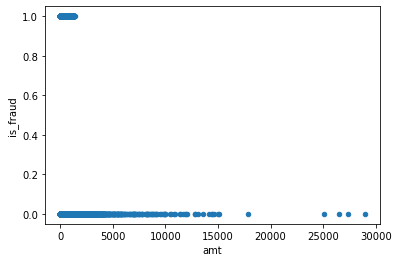

In [66]:
# Creating scatter chart 
data_train.plot.scatter(x='amt',y='is_fraud')

In [67]:
# Using the random sampling technique
data = data_train.sample(frac = 0.1, random_state = 48) 
print(data.shape) 
print(data.describe()) 

(104858, 23)
         Unnamed: 0        cc_num            amt            zip  \
count  1.048580e+05  1.048580e+05  104858.000000  104858.000000   
mean   5.257402e+05  4.111583e+17      69.502708   48854.895745   
std    3.030444e+05  1.300241e+18     160.764879   26829.207195   
min    1.000000e+01  6.041621e+10       1.000000    1257.000000   
25%    2.638605e+05  1.800408e+14       9.660000   26292.000000   
50%    5.258800e+05  3.521420e+15      47.300000   48202.000000   
75%    7.888505e+05  4.642260e+15      82.470000   72011.000000   
max    1.048574e+06  4.992350e+18   17897.240000   99783.000000   

                 lat           long      city_pop     unix_time  \
count  104858.000000  104858.000000  1.048580e+05  1.048580e+05   
mean       38.519346     -90.238327  8.836950e+04  1.344953e+09   
std         5.099992      13.734371  2.997417e+05  1.020622e+07   
min        20.027100    -165.672300  2.300000e+01  1.325376e+09   
25%        34.544400     -96.798000  7.430000e+0

In [68]:
# Determine number of fraud cases in dataset 
fraud = data[data['is_fraud'] == 1] 
valid = data[data['is_fraud'] == 0] 
outlierFraction = len(fraud)/float(len(valid)) 
print(outlierFraction) 
print('Fraud Cases: {}'.format(len(data[data['is_fraud'] == 1]))) 
print('Valid Transactions: {}'.format(len(data[data['is_fraud'] == 0]))) 

0.005619917139788246
Fraud Cases: 586
Valid Transactions: 104272


In [69]:
# Printing the details for fraudulent transactions
print('Amount details of the fraudulent transaction') 
fraud.amt.describe() 

Amount details of the fraudulent transaction


count     586.000000
mean      537.959795
std       384.175231
min         4.790000
25%       275.185000
50%       508.105000
75%       899.810000
max      1210.190000
Name: amt, dtype: float64

In [70]:
# Printing the details for valid transactions
print('Amount details of the valid transaction') 
valid.amt.describe() 

Amount details of the valid transaction


count    104272.000000
mean         66.870018
std         154.668393
min           1.000000
25%           9.620000
50%          47.060000
75%          81.890000
max       17897.240000
Name: amt, dtype: float64

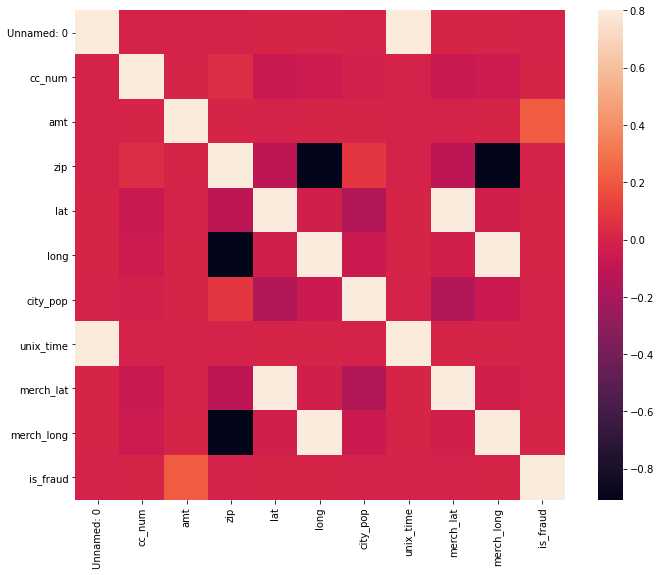

In [71]:
# Creating a heatmap for correlation matrix to understand the relationship between variables, we have 'is_fraud' as target variable
corrmat = data.corr() 
fig = plt.figure(figsize = (12, 9)) 
sns.heatmap(corrmat, vmax = .8, square = True) 
plt.show() 

In [72]:
# From the correlation matrix, 
# we can clearly see that there is a strong correlation between variable 'amt' and target variable'is_fraud'

In [73]:
# skewness along the index axis 
data.skew(axis = 0, skipna = True)

Unnamed: 0    -0.004181
cc_num         2.880267
amt           40.905241
zip            0.074502
lat           -0.155917
long          -1.159562
city_pop       5.605640
unix_time     -0.100023
merch_lat     -0.152958
merch_long    -1.156825
is_fraud      13.264585
dtype: float64

In [119]:
# Dividing the X and the Y from the dataset, we are selecting few columns as rest the columns contain string values which are not useful in this analysis and creating error
X = data.filter(['amt','zip','lat','long','city_pop','cc_num'], axis=1)

Y = data['is_fraud'] 
print(X.shape) 
print(Y.shape) 
# getting just the values for the sake of processing  
# (its a numpy array with no columns) 
xData = X.values 
yData = Y.values 

(104858, 6)
(104858,)


In [120]:
# Using Skicit-learn to split data into training and testing sets 
from sklearn.model_selection import train_test_split 
# Split the data into training and testing sets 
xTrain, xTest, yTrain, yTest = train_test_split( 
        xData, yData, test_size = 0.2, random_state = 42) 

In [121]:
# Building the Random Forest Classifier (RANDOM FOREST) 
from sklearn.ensemble import RandomForestClassifier 
# random forest model creation 
rfc = RandomForestClassifier() 
rfc.fit(xTrain, yTrain) 
# predictions 
yPred = rfc.predict(xTest) 

In [122]:
# Evaluating the classifier 
# printing every score of the classifier 
# scoring in anything 
from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 
  
n_outliers = len(fraud) 
n_errors = (yPred != yTest).sum() 
print("The model used is Random Forest classifier") 
  
acc = accuracy_score(yTest, yPred) 
print("The accuracy is {}".format(acc)) 
  
prec = precision_score(yTest, yPred) 
print("The precision is {}".format(prec)) 
  
rec = recall_score(yTest, yPred) 
print("The recall is {}".format(rec)) 
  
f1 = f1_score(yTest, yPred) 
print("The F1-Score is {}".format(f1)) 
  
MCC = matthews_corrcoef(yTest, yPred) 
print("The Matthews correlation coefficient is{}".format(MCC)) 

The model used is Random Forest classifier
The accuracy is 0.9937058935723823
The precision is 0.4153846153846154
The recall is 0.2231404958677686
The F1-Score is 0.2903225806451613
The Matthews correlation coefficient is0.30155769104191427


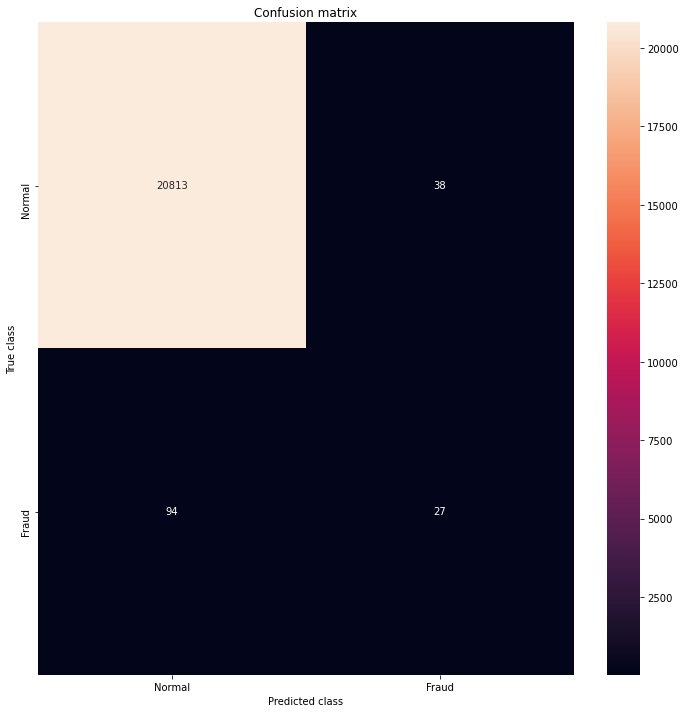

In [123]:

# printing the confusion matrix 
LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(yTest, yPred) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

In [137]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [138]:
# define a random state
state = 1

# define the outlier detection methods
classifiers = {
    # contamination is the number of outliers we think there are
    'Isolation Forest': IsolationForest(max_samples = len(X),
                                       contamination = outlier_fraction,
                                       random_state = state),
    # number of neighbors to consider, the higher the percentage of outliers the higher you want to make this number
    'Local Outlier Factor': LocalOutlierFactor(
    n_neighbors = 20,
    contamination = outlier_fraction)
}

In [139]:
n_outliers = len(fraud)

for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    # fit the data and tag outliers
    if clf_name == 'Local Outlier Factor':
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
        
    # reshape the prediction values to 0 for valid and 1 for fraud
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1

    # calculate the number of errors
    n_errors = (y_pred != Y).sum()
    
     # classification matrix
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(Y, y_pred))
    print(classification_report(Y, y_pred))

Isolation Forest: 1066
0.9898338705678156
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99    104272
         1.0       0.09      0.09      0.09       586

    accuracy                           0.99    104858
   macro avg       0.54      0.54      0.54    104858
weighted avg       0.99      0.99      0.99    104858

Local Outlier Factor: 770
0.9926567357760019
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104272
         1.0       0.34      0.35      0.35       586

    accuracy                           0.99    104858
   macro avg       0.67      0.67      0.67    104858
weighted avg       0.99      0.99      0.99    104858

